In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [148]:
df = pd.read_csv(r"C:\Users\tarun\Desktop\diabetes.csv")

In [149]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [151]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [152]:
#values cannot be zero

In [153]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [154]:
df['BloodPressure'] = df['BloodPressure'].replace(0,np.NaN)
mean = df['BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].replace(np.NaN,mean)

df['SkinThickness'] = df['SkinThickness'].replace(0,np.NaN)
mean = df['SkinThickness'].mean()
df['SkinThickness'] = df['SkinThickness'].replace(np.NaN,mean)

df['Insulin'] = df['Insulin'].replace(0,np.NaN)
mean = df['Insulin'].mean()
df['Insulin'] = df['Insulin'].replace(np.NaN,mean)

df['BMI'] = df['BMI'].replace(0,np.NaN)
mean = df['BMI'].mean()
df['BMI'] = df['BMI'].replace(np.NaN,mean)

df['Glucose'] = df['Glucose'].replace(0,np.NaN)
mean = df['Glucose'].mean()
df['Glucose'] = df['Glucose'].replace(np.NaN,mean)

In [155]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [197]:
x = df.iloc[:,0:8].values
y = df.iloc[:,8].values

In [198]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [199]:
X

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [200]:
y.shape

(768,)

In [201]:
x_train , x_test,y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [202]:
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
       # print("for k = {}, accuracy = {}".format(i,acc))
    
    acc_list.append(acc)
    err_list.append(1 - acc)

In [203]:
acc_list


[0.7239583333333334,
 0.7291666666666666,
 0.78125,
 0.7760416666666666,
 0.765625,
 0.7708333333333334,
 0.7760416666666666,
 0.78125,
 0.7864583333333334,
 0.7864583333333334,
 0.7864583333333334,
 0.78125,
 0.7916666666666666,
 0.78125,
 0.8072916666666666,
 0.78125,
 0.7708333333333334,
 0.7864583333333334,
 0.7604166666666666,
 0.765625,
 0.765625,
 0.765625,
 0.765625,
 0.7604166666666666]

In [204]:
err_list

[0.27604166666666663,
 0.27083333333333337,
 0.21875,
 0.22395833333333337,
 0.234375,
 0.22916666666666663,
 0.22395833333333337,
 0.21875,
 0.21354166666666663,
 0.21354166666666663,
 0.21354166666666663,
 0.21875,
 0.20833333333333337,
 0.21875,
 0.19270833333333337,
 0.21875,
 0.22916666666666663,
 0.21354166666666663,
 0.23958333333333337,
 0.234375,
 0.234375,
 0.234375,
 0.234375,
 0.23958333333333337]

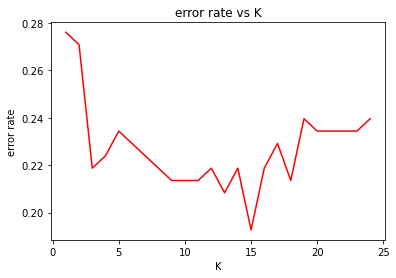

In [205]:
plt.plot(list(range(1,25)),err_list,c = 'r')
plt.title('error rate vs K')
plt.xlabel("K")
plt.ylabel('error rate')
plt.show()

In [226]:
model = KNeighborsClassifier(n_neighbors=15)

In [227]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [228]:
confusion_matrix(y_test,y_pred)

array([[117,  13],
       [ 24,  38]], dtype=int64)

In [229]:
accuracy_score(y_test,y_pred)

0.8072916666666666

In [236]:
from sklearn.linear_model import Ridge

In [248]:
model = Ridge(alpha=50)

In [249]:
model.fit(x_test,y_test)

Ridge(alpha=50)

In [250]:
model.score(x_test,y_test)

0.35835646629375617

In [251]:
model.score(x_train,y_train)

0.27248388362768095

In [252]:
from sklearn.linear_model import Lasso

In [277]:
model = Ridge(alpha=20)

In [278]:
model.fit(x_test,y_test)

Ridge(alpha=20)

In [279]:
model.score(x_test,y_test)

0.36718168811227236

In [280]:
model.score(x_test,y_test)

0.36718168811227236